# <center>MO444 - Aprendizado de Máquina e Reconhecimento de Padrões</center>
## <center>Primeiro semestre de 2021</center>
## <center>Projeto 2: Regressão e Classificação</center>
## <center>Discentes: Elisa Dell Arriva (135551) e Felipe de Carvalho Pereira (230214)</center>
_________________________________________________________________________

# 1 Introdução

O presente *notebook* consiste no segundo projeto avaliativo da disciplina MO444 - Aprendizado de Máquina e Reconhecimento de Padrões, ministrada pela Profa. Dra. Esther Colombini. O principal objetivo da atividade foi o de implementar e experimentar métodos de aprendizado de máquina para resolver tarefas de classificação e regressão.<br>

Na primeira parte do projeto, descrita na Seção 2, implementamos um algoritmo de regressão linear e polinomial com uso da técnica denominada *gradiente descendente*. Em seguida, aplicamos esse algoritmo para cada um dos dois *datasets* fornecidos e analisamos os resultados obtidos.

Na segunda etapa, descrita na Seção 3, (?)


# 2 *Parte $I$ - Tarefa de Regressão*

Nesta tarefa, almejamos aplicar métodos de regressão linear e polinomial para prever a trajetória de uma bola de futebol que fora chutada. Inicialmente, considere que temos uma sequência de pontos do espaço 3-dimensional, de maneira que tais pontos representam as primeiras posições da bola a partir de um certo instante de tempo. Para cada uma das dimensões ($X, Y$ e $Z$), encontramos equações que explicam a trajetória da bola para os pontos fornecidos em função do tempo. Em seguida, utilizamos tais equações para extrapolar as informações já conhecidas e deduzir a continuação da trajetória da bola.

Junto à especificação do projeto, foram disponibilizados dois *datasets*, denominados kick1 e kick2. Em ambos os *datasets* temos 20 linhas. Cada linha descreve os valores das 3 coordenadas da bola no instante de tempo em que a captura foi feita. De acordo com a especificação, as capturas foram feitas com uma taxa de 60 *frames* por segundo. Assumiremos que os pontos descritos foram capturados de maneira sequencial a partir do instante de tempo em que o chute foi desferido.

Neste ponto, apresentamos o nosso algoritmo de regressão polinomial, o qual foi baseado no método gradiente descendente, visto em aula. Dizemos que um polinômio *descreve* um conjunto de planos no ponto cartesiano, se a curva produzida por esse polinômio se aproxima dos pontos dispostos no plano. Suponha que desejamos obter uma equação polinomial de grau $n \geq 1$ representada por $f(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \dots + \theta_n x^n$ que descreve um conjunto de pontos fornecido.

Denote por $x_i$ e $y_i$ as coordenadas do $i$-ésimo ponto, entre os $m$ pontos anotados. Seja $J(\theta_0, \dots, \theta_n) = \dfrac{1}{2m} \cdot \sum_{i = 1}^m (f(x_i) - y_i)^2$ a função de custo (*squared error function*) dos coeficientes $\theta_0, \theta_1, \dots, \theta_n$ em relação aos $m$ pontos. Nosso objetivo é encontrar valores para os coeficientes que minimizam $J(\theta_0, \dots, \theta_n)$. Suponha que, inicialmente, o valor do coeficiente $\theta_k$ é arbitrário para todo $k \in \{0,1,2, \dots, n\}$. Além disso, assuma que o algoritmo recebe dois parâmetros: $\alpha$ (*taxa de aprendizado*) e $\beta$ (*valor de tolerância*). Em cada iteração do algoritmo, fazemos o que segue.

Primeiramente, salvamos os valores dos coeficientes fazendo $\mu_k \leftarrow \theta_k$ para todo $k \in \{0,1,2, \dots, n\}$. Em seguida, para cada coeficiente $\theta_k$, calculamos $t_k \leftarrow \theta_k - \alpha \cdot \dfrac{\partial}{\partial \theta_k} J(\theta_0, \dots, \theta_n)$. Depois, fazemos $\theta_k \leftarrow t_k$ para cada $k \in \{0,1,2, \dots, n\}$.

O procedimento do parágrafo acima é repetido até que tenhamos $|t_k - \mu_k| < \beta$ para todo $k \in \{0,1,2, \dots, n\}$. Quando isso ocorre, significa que a mudança em cada coeficiente foi menor do que a tolerância adotada e, portanto, consideramos que o algoritmo convergiu para um valor suficientemente próximo de um mínimo local e encerramos o processo.

Note que, de acordo com o que vimos em aula, $\dfrac{\partial}{\partial \theta_k} J(\theta_0, \dots, \theta_n) = \dfrac{1}{m} \cdot \sum_{i = 1}^{m}(f(x_i) - y_i) \cdot x_{i}^{k}$. Além disso, observe que se $n = 1$, então trata-se do caso especial em que obtemos uma regressão linear.

A seguir, temos o código-fonte relativo à Parte $I$ do projeto.

In [1]:
# Importação de módulos
import numpy as np
import pandas as pd
import random
import statistics
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [2]:
# Plota um conjunto de pontos 2D
def plot_2D_points(x_points, y_points, label_x, label_y): 
    plt.scatter(x_points, y_points, color="red")
    plt.grid(linestyle='--')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()
    plt.close()

# Plota um conjunto de pontos 2D fornecido e
# um conjunto de pontos obtido de uma função polinomial (regressão) em um dado intervalo.
def plot_2D_regression(x_points, y_points, min_input, max_input, coefficients_array, label_x, label_y):
    
    # Plota os pontos dados na entrada
    plt.scatter(x_points, y_points, color="blue")
    
    # Plota a função polinomimial de acordo com o array de coeficientes dado na entrada
    x_line_points = np.linspace(min_input, max_input,100) # Toma as coordenadas x dos pontos do polinômio
    y_line_points = np.zeros(100)
    for i in range(coefficients_array.size): #Calcula as coordenadas y dos pontos do polinômio
        y_line_points += coefficients_array[i]*(x_line_points**i)
    plt.plot(x_line_points, y_line_points, '-o', color='red', linewidth=1, markersize=0) #Plota os pontos do polinômio
    plt.grid(linestyle='--')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()
    plt.close()

# Plota um conjunto de pontos 3D fornecido e
# um conjunto de pontos 3D obtidos pela combinação de três funções polinomiais (regressões).
# Cada função polinomial calcula uma coordenada de um ponto, tendo como variável livre o tempo.
def plot_3D_regression(x_points, y_points, z_points, coefficients_array_X, coefficients_array_Y, coefficients_array_Z):
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    
    # Plota os pontos dados na entrada em azul e suas projeções nos planos (sombras) em cinza. 
    ax.scatter3D(x_points, y_points, z_points, color='blue')
    ax.scatter(x_points, y_points, np.zeros(z_points.size), color='gray')
    ax.scatter(x_points, np.array([2]*y_points.size), z_points, color='gray')
    ax.scatter(np.array([-3]*x_points.size), y_points, z_points, color='gray')
    
    # Configura os limites do plot para cada dimensão
    ax.set_xlim3d(-3, 3) # Limites da dimensão X
    ax.set_ylim3d(0, 2.1) # Limites da dimensão Y
    ax.set_zlim3d(0.005, 0.3) # Limites da dimensão Z
    
    # Calcula a raiz da equação polinomial que prevê a dimensão Y, ou seja,
    # calcula em que instante de tempo teremos y = 0, momento em que a bola chega na linha de fundo
    root_y = max(np.roots(np.flip(coefficients_array_Y)))
    
    #Obtém 100 time_stamps no instante de tempo 0 até o instante de tempo root_y
    time_stamps = np.linspace(0, root_y, 100)
    
    # Prediz as coordenadas dos pontos da regressão
    # para cada timestamp, de acordo com cada função polinomial
    x_line_points = np.zeros(100)
    y_line_points = np.zeros(100)
    z_line_points = np.zeros(100)
    for i in range(coefficients_array_X.size):
        x_line_points += coefficients_array_X[i]*(time_stamps**i)
    for i in range(coefficients_array_Y.size):
        y_line_points += coefficients_array_Y[i]*(time_stamps**i)
    for i in range(coefficients_array_Z.size):
        z_line_points += coefficients_array_Z[i]*(time_stamps**i)

    # Plota a regressão em vermelho e a projeção da regressão em cada plano (sombras) em cinza
    ax.plot3D(x_line_points, y_line_points, z_line_points, color='red')
    ax.plot(x_line_points, y_line_points, np.zeros(z_line_points.size), color='gray')
    ax.plot(x_line_points, np.array([2]*y_line_points.size), z_line_points, color='gray')
    ax.plot(np.array([-3]*x_line_points.size), y_line_points, z_line_points, color='gray')
    
    # Configura legenda e posição da visualização
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(20, -60)
    plt.gcf().set_dpi(110)
    plt.show()
    plt.close()
    
# Retorna o valor do polinômio f(x) para uma entrada x, dados os coeficientes do polinômio f(x)
def get_hypothesis_value(coefficients_array, x):
    hypothesis_value = 0
    for i in range(coefficients_array.size):
        hypothesis_value += coefficients_array[i]*(x**i)
    return hypothesis_value

# Retorna um array com os valores do polinômio f(x) para um conjunto de valores de entrada,
# dados os coeficientes do polinômio f(x).
def get_hypothesis_values_array(coefficients_array, input_values):
    hypothesis_values_array = np.empty(input_values.size)
    for i in range(input_values.size):
        hypothesis_values_array[i] = get_hypothesis_value(coefficients_array, input_values[i])
    return hypothesis_values_array

# Retorna um array com os valores das derivadas parciais em relação a cada coeficiente de um polinômio f(x),
# considerando na entrada: os coeficientes do polinômio f(x);
# os valores do polinômio f(x) para um conjunto de valores de entrada;
# os valores esperados de saída para cada elemento dos valores de entrada.
def get_partial_derivatives_array(coefficients_array, hypothesis_values_array, input_values, output_values):
    # Array que contém as diferenças entre os valores de saída esperados (anotados) e os valores
    # do polinômio aplicados nos valores de entrada (valores da hipótese).
    diference_values_array = np.empty(input_values.size)
    for i in range(input_values.size):
        diference_values_array[i] = hypothesis_values_array[i] - output_values[i]
    
    # Array conténdo os valores das derivadas parciais em relação a cada coeficiente,
    # de acordo com a fórmula descrita no início dessa Seção.
    partial_derivatives_array = np.zeros(coefficients_array.size)
    for i in range(input_values.size): # Para cada valor de entrada
        auxiliar_variable = diference_values_array[i] # Toma a diferença entre o valor da hipótese e o valor esperado
        for j in range(coefficients_array.size): #  Para cada coeficiente do polinômio
            auxiliar_variable += auxiliar_variable*input_values[i] # Toma a diferença vezes o valor da entrada elevado ao índice do coeficiente (Observe que nós reaproveitamos a variável auxiliar em cada coeficiente, para não ter que calcular várias potências do valor de entrada, bastanto multiplicar novamente pelo valor de entrada)
            partial_derivatives_array[j] += auxiliar_variable # Soma na célula que armazena a derivada parcial do j-ésimo coeficiente
    for i in range(coefficients_array.size): # Dividimos cada célula do array de derivadas parciais pela quantidade de valores de entrada
        partial_derivatives_array[i] = partial_derivatives_array[i]/input_values.size

    return partial_derivatives_array # Retorna o array contendo os valores das derivadas parciais

# Atualiza o array de coeficientes do polinômio a partir da taxa de apredizando alfa e das derivadas parciais
def update_coefficients_array(coefficients_array, partial_derivatives_array, learning_rate):
    for i in range(coefficients_array.size):
        coefficients_array[i] = coefficients_array[i] - learning_rate*partial_derivatives_array[i]

# Retorna um array de coeficientes de um polinômio de grau 'degree' (regressão) utilizando o método do gradiente
def get_regression(input_values, output_values, degree, learning_rate, tolerance):
    coefficients_array = np.zeros(degree+1) # Array de 'degree+1' coeficientes do polinomio de grau 'degree'
    iteration = 1 # Contador de iterações
    
    while(True): # Enquanto o laço não for internamente interrompido faça
        old_coefficients_array = coefficients_array.copy() # Salva os coeficientes atuais
        hypothesis_values_array = get_hypothesis_values_array(coefficients_array, input_values) # Obtém os valores hipotéticos para os elementos da entrada, usando os coeficientes atuais
        partial_derivatives_array = get_partial_derivatives_array(coefficients_array, hypothesis_values_array, input_values, output_values) # Calcula o array de derivadas dos coeficientes atuais do polinômio
        update_coefficients_array(coefficients_array, partial_derivatives_array, learning_rate) # Atualiza os coeficientes
        if max(abs(coefficients_array - old_coefficients_array)) < tolerance: # Se nenhuma mudança nos coeficientes foi maior ou igual a tolerância, então encerre o laço
            break
        iteration += 1
    
    return coefficients_array, iteration # Retorna o array de coeficientes e o número total de iterações

# Retorna o valor do MSE de uma regressão
def get_MSE(coefficients_array, input_values, output_values):
    hypothesis_values_array = get_hypothesis_values_array(coefficients_array, input_values)
    mse = 0
    for i in range(hypothesis_values_array.size):
        mse = mse + (hypothesis_values_array[i] - output_values[i])**2
    mse = mse/hypothesis_values_array.size
    return mse

Deste ponto em diante, conduzimos os experimentos com os *datasets* kick1 e kick2 nas Seções 2.1 e 2.2. Começamos fazendo o que segue para o kick1 (Seção 2.1).

Primeiramente, para cada dimensão $(X, Y$ e $Z)$, obtemos uma regressão linear e uma regressão polinomial de grau 2 capazes de predizer a posição da bola, naquela dimensão, em função do tempo. Em cada caso, analisamos a qualidade de predição através do cálculo do *mean squared error* (MSE) e escolhemos a melhor regressão para cada dimensão.

Usando as três regressões escolhidas, uma para cada dimensão, predimos a continuação da trajetória da bola até o momento em que ela atinge a linha de fundo, isto é, quanto $y = 0$. No instante de tempo em que isso acontece, verificamos as outras coordenadas da bola e analisamos se o goleiro defende ou não a bola.

Por fim, faremos o mesmo procedimento para o kick2 (Seção 2.2). A Seção 2.3 é dedicada à verificação do impacto de utilizar diferentes valores para a taxa de aprendizado $(\alpha)$. Observe que os valores de $\alpha$ utilizados nas Seções 2.1 e 2.2 foram escolhidos através de testagem prévia realizada pela dupla. A existência da Seção 2.3, separando a análise de impacto do $\alpha$ das demais seções, serve apenas para simplificar a leitura e compressão das Seções 2.1 e 2.2, tornando-as menos densas.

## 2.1 *Dataset* kick1

Primeiramente, carregamos os 20 pontos fornecidos no arquivo kick1.dat. Como cada ponto foi capturado sequencialmente a cada 1/60 segundo, a partir do instante de tempo 0, armazenamos os *timestamps* dos 20 primeiros pontos do kick1 no vetor *time_stamps*. As coordenadas $x, y$ e $z$ desses 20 pontos são armazenadas nos vetores *output_values_X*, *output_values_Y* e *output_values_Z*.

In [3]:
df = pd.read_table("kick1.dat", sep=' ', header=None).to_numpy()
time_stamps = np.linspace(0,(1/60)*19,20)
output_values_X = df[:,0]
output_values_Y = df[:,1]
output_values_Z = df[:,2]

Inicialmente, determinamos os valores dos parâmetros do nosso algoritmo.

In [4]:
learning_rate = 0.95
tolerance = 0.00001

Em seguida, obtemos duas regressões para explicar as coordenadas $x$ dos 20 pontos do kick1. A primeira delas linear.

In [5]:
degree = 1
coefficients_array_X_linear, n_iterations = get_regression(time_stamps, output_values_X, degree, learning_rate, tolerance)

Abaixo, temos: a descrição da equação (com variável livre $t$); o valor MSE da regressão; e o *plot* da regressão.

Equação: (-0.25891702401669486) + (-2.9613544312639712)*t
Valor do MSE: 0.0007186772502949981


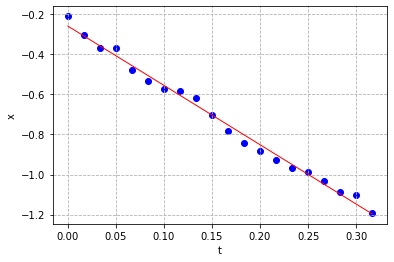

In [6]:
print("Equação: (" + str(coefficients_array_X_linear[0]) + ") + (" + str(coefficients_array_X_linear[1]) + ")*t")
print("Valor do MSE: " + str(get_MSE(coefficients_array_X_linear, time_stamps, output_values_X)))
plot_2D_regression(time_stamps, output_values_X, 0, (1/60)*19, coefficients_array_X_linear, "t", "x")

Repetimos o procedimento, obtendo uma equação de segundo grau.

Equação: (-0.23369339442872608) + (-3.44184775924849)*t + (1.484830558883293)*t^2
Valor do MSE: 0.0005212829251964846


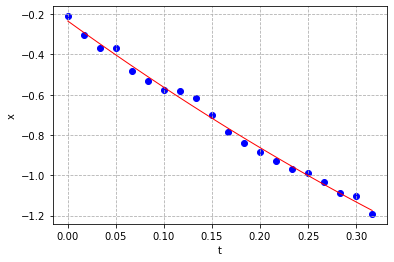

In [7]:
degree = 2
coefficients_array_X_poly, n_iterations = get_regression(time_stamps, output_values_X, degree, learning_rate, tolerance)
print("Equação: (" + str(coefficients_array_X_poly[0]) + ") + (" + str(coefficients_array_X_poly[1]) + ")*t + (" + str(coefficients_array_X_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_X_poly, time_stamps, output_values_X)))
plot_2D_regression(time_stamps, output_values_X, 0, (1/60)*19, coefficients_array_X_poly, "t", "x")

Observe que embora ambas as equações estejam aparentemente bem ajustadas à distribuição dos pontos, **a equação de segundo grau** apresentou valor de MSE ligeiramente menor que a equação linear. Por essa razão, escolhemos **a equação de segundo grau para predizer a trajetória na coordenada $x$**.

Agora, repetiremos esse procedimento para a dimensão $Y$. Primeiro obtemos uma equação linear.

Equação: (2.050273670855188) + (-2.991397946824787)*t
Valor do MSE: 0.00011480003601208811


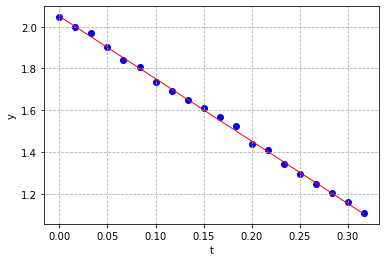

In [8]:
degree = 1
coefficients_array_Y_linear, n_iterations = get_regression(time_stamps, output_values_Y, degree, learning_rate, tolerance)
print("Equação: (" + str(coefficients_array_Y_linear[0]) + ") + (" + str(coefficients_array_Y_linear[1]) + ")*t")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Y_linear, time_stamps, output_values_Y)))
plot_2D_regression(time_stamps, output_values_Y, 0, (1/60)*19, coefficients_array_Y_linear, "t", "y")

Agora, obtemos uma equação de segundo grau.

Equação: (2.047622208858546) + (-2.938865564602185)*t + (-0.1651806252144278)*t^2
Valor do MSE: 0.00011820151586598973


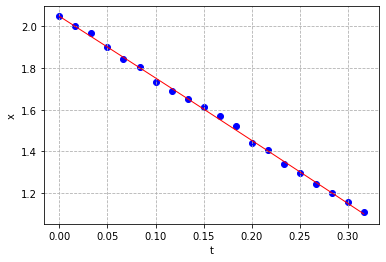

In [9]:
degree = 2
coefficients_array_Y_poly, n_iterations = get_regression(time_stamps, output_values_Y, degree, learning_rate, tolerance)
print("Equação: (" + str(coefficients_array_Y_poly[0]) + ") + (" + str(coefficients_array_Y_poly[1]) + ")*t + (" + str(coefficients_array_Y_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Y_poly, time_stamps, output_values_Y)))
plot_2D_regression(time_stamps, output_values_Y, 0, (1/60)*19, coefficients_array_Y_poly, "t", "x")

Observe que embora ambas as equações estejam aparentemente bem ajustadas à distribuição dos pontos, **a equação de linear** apresentou valor de MSE ligeiramente menor que a equação de segundo grau. Por essa razão, escolhemos **a equação linear para predizer a trajetória na coordenada $y$**.

Agora, repetiremos esse procedimento para a dimensão $Z$. Primeiro obtemos uma equação linear.

Equação: (0.12368676163201293) + (-0.026001533999172818)*t
Valor do MSE: 0.00019467108485596215


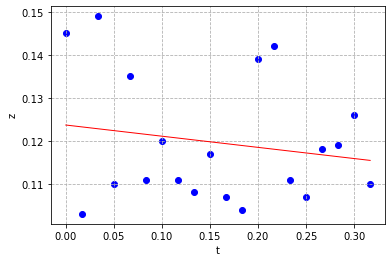

In [10]:
degree = 1
coefficients_array_Z_linear, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Equação: (" + str(coefficients_array_Z_linear[0]) + ") + (" + str(coefficients_array_Z_linear[1]) + ")*t")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_linear, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_linear, "t", "z")

Agora, obtemos uma equação de segundo grau.

Equação: (0.12166376620377486) + (0.012772289259149758)*t + (-0.12014564020723666)*t^2
Valor do MSE: 0.00020188982911513347


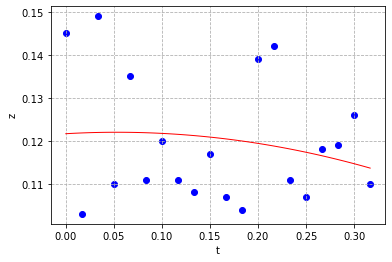

In [11]:
degree = 2
coefficients_array_Z_poly, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Equação: (" + str(coefficients_array_Z_poly[0]) + ") + (" + str(coefficients_array_Z_poly[1]) + ")*t + (" + str(coefficients_array_Z_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_poly, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_poly, "t", "z")

Nesse caso, parece haver bastante ruído na distribuição dos pontos em relação à coordenada $z$ . Observe, por exemplo, que a especificação do projeto afirma que a bola tem diâmetro 21.5 e que a captura dos pontos se refere ao centro da bola. Isso implica que a altura (coordenada $z$) mínima que deveríamos ter é 10.75. Todavia, existem pontos que estão claramente abaixo desse valor. De modo geral, dado o curto intervalo de tempo, o comportamento da bola segundo a distribuição visualizada acima é pouco plausível. Portanto, consideraremos que há bastante ruído na entrada em relação à dimensão $X$ e continuaremos a nossa análise.

**A equação de linear** apresentou valor de MSE ligeiramente menor que a equação de segundo grau. Por essa razão, escolhemos **a equação linear para predizer a trajetória na coordenada $z$**.

Portanto, para as dimensões $X$ e $Z$, equações lineares foram escolhidas e para predizer a dimensão $Y$, uma equação de segundo grau foi escolhida. Utilizaremos as três equações para predizer a trajetória tridimensional da bola desde $t = 0$ até o instante de tempo em que temos $y = 0$. Segue o *plot* da regressão.

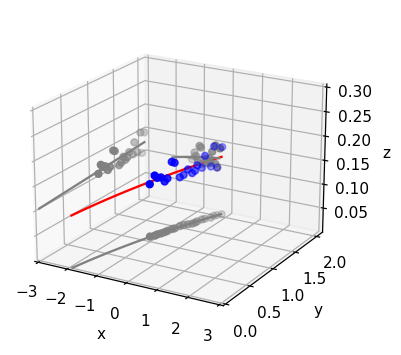

In [12]:
plot_3D_regression(output_values_X, output_values_Y, output_values_Z, coefficients_array_X_poly, coefficients_array_Y_linear, coefficients_array_Z_linear)

Sugundo a predição, o instante de tempo que ocorre $y = 0$ é:

In [13]:
t_max = max(np.roots(np.flip(coefficients_array_Y_linear)))
print("t_max: " + str(t_max))

t_max: 0.6853898101492805


Portanto, as coordenadas da bola nesse instante de tempo são:

In [14]:
print("x: " + str(get_hypothesis_value(coefficients_array_X_poly, t_max)))
print("y: " + str(get_hypothesis_value(coefficients_array_Y_linear, t_max)))
print("z: " + str(get_hypothesis_value(coefficients_array_Z_linear, t_max)))

x: -1.8951879733179737
y: 0.0
z: 0.10586557518072981


Conforme a primeira imagem da especificação do projeto, temos que a largura entre as traves é de aproximadamente 3 metros e sabemos que o goleiro está à mesma distância das traves, isto é, no centro do gol. Vamos assumir que a altura da baliza é de 1 metro e que até o momento de chegada da bola em $y = 0$, o goleiro consegue se mover até 1.5 metros horizontalmente e até 0.5 metro de altura.

De acordo com a nossa predição da trajetória da bola, a bola irá em direção ao gol, mas o goleiro não conseguirá alcançar a bola.

## 2.2 *Dataset* kick2

Nesta seção, repetiremos tudo o que foi feito na Seção 2.1, só que agora para o *dataset* kick2.

Primeiramente, carregamos os 20 pontos fornecidos no arquivo kick2.dat. Como cada ponto foi capturado sequencialmente a cada 1/60 segundo, a partir do instante de tempo 0, armazenamos os *timestamps* dos 20 primeiros pontos do kick1 no vetor *time_stamps*. As coordenadas $x, y$ e $z$ desses 20 pontos são armazenadas nos vetores *output_values_X*, *output_values_Y* e *output_values_Z*.

In [15]:
df = pd.read_table("kick2.dat", sep=' ', header=None).to_numpy()
time_stamps = np.linspace(0,(1/60)*19,20)
output_values_X = df[:,0]
output_values_Y = df[:,1]
output_values_Z = df[:,2]

Em seguida, obtemos duas regressões para explicar as coordenadas $x$ dos 20 pontos do kick1. A primeira delas linear.

In [16]:
degree = 1
coefficients_array_X_linear, n_iterations = get_regression(time_stamps, output_values_X, degree, learning_rate, tolerance)

Abaixo, temos: a descrição da equação (com variável livre $t$); o valor MSE da regressão; e o *plot* da regressão.

Equação: (-0.13120042719406394) + (-1.465594081317013)*t
Valor do MSE: 0.0002471698047545332


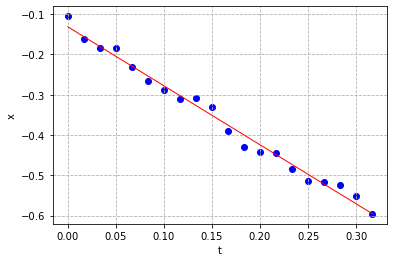

In [17]:
print("Equação: (" + str(coefficients_array_X_linear[0]) + ") + (" + str(coefficients_array_X_linear[1]) + ")*t")
print("Valor do MSE: " + str(get_MSE(coefficients_array_X_linear, time_stamps, output_values_X)))
plot_2D_regression(time_stamps, output_values_X, 0, (1/60)*19, coefficients_array_X_linear, "t", "x")

Repetimos o procedimento, obtendo uma equação de segundo grau.

Equação: (-0.12105476571694875) + (-1.6577678035480514)*t + (0.592321404319561)*t^2
Valor do MSE: 0.00020430465262684673


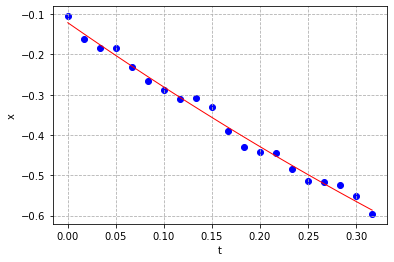

In [18]:
degree = 2
coefficients_array_X_poly, n_iterations = get_regression(time_stamps, output_values_X, degree, learning_rate, tolerance)
print("Equação: (" + str(coefficients_array_X_poly[0]) + ") + (" + str(coefficients_array_X_poly[1]) + ")*t + (" + str(coefficients_array_X_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_X_poly, time_stamps, output_values_X)))
plot_2D_regression(time_stamps, output_values_X, 0, (1/60)*19, coefficients_array_X_poly, "t", "x")

Observe que embora ambas as equações estejam aparentemente bem ajustadas à distribuição dos pontos, **a equação de segundo grau** apresentou valor de MSE ligeiramente menor que a equação linear. Por essa razão, escolhemos **a equação de segundo grau para predizer a trajetória na coordenada $x$**.

Agora, repetiremos esse procedimento para a dimensão $Y$. Primeiro obtemos uma equação linear.

Equação: (2.050273670855188) + (-2.991397946824787)*t
Valor do MSE: 0.00011480003601208811


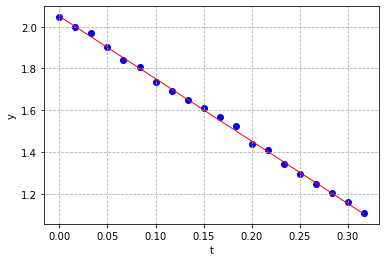

In [19]:
degree = 1
coefficients_array_Y_linear, n_iterations = get_regression(time_stamps, output_values_Y, degree, learning_rate, tolerance)
print("Equação: (" + str(coefficients_array_Y_linear[0]) + ") + (" + str(coefficients_array_Y_linear[1]) + ")*t")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Y_linear, time_stamps, output_values_Y)))
plot_2D_regression(time_stamps, output_values_Y, 0, (1/60)*19, coefficients_array_Y_linear, "t", "y")

Agora, obtemos uma equação de segundo grau.

Equação: (2.047622208858546) + (-2.938865564602185)*t + (-0.1651806252144278)*t^2
Valor do MSE: 0.00011820151586598973


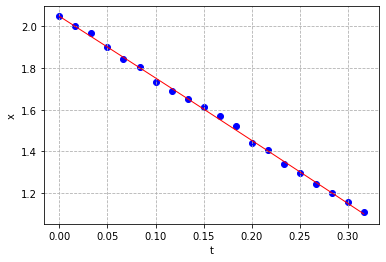

In [20]:
degree = 2
coefficients_array_Y_poly, n_iterations = get_regression(time_stamps, output_values_Y, degree, learning_rate, tolerance)
print("Equação: (" + str(coefficients_array_Y_poly[0]) + ") + (" + str(coefficients_array_Y_poly[1]) + ")*t + (" + str(coefficients_array_Y_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Y_poly, time_stamps, output_values_Y)))
plot_2D_regression(time_stamps, output_values_Y, 0, (1/60)*19, coefficients_array_Y_poly, "t", "x")

Observe que embora ambas as equações estejam aparentemente bem ajustadas à distribuição dos pontos, **a equação de linear** apresentou valor de MSE ligeiramente menor que a equação de segundo grau. Por essa razão, escolhemos **a equação linear para predizer a trajetória na coordenada $y$**.

Agora, repetiremos esse procedimento para a dimensão $Z$. Primeiro obtemos uma equação linear.

Equação: (0.169277984804647) + (0.43331802885061516)*t
Valor do MSE: 0.0002930513940687716


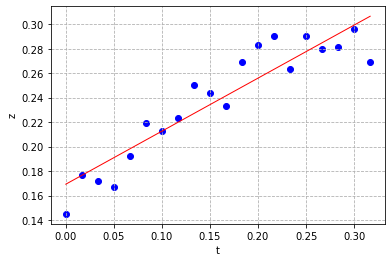

In [21]:
degree = 1
coefficients_array_Z_linear, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Equação: (" + str(coefficients_array_Z_linear[0]) + ") + (" + str(coefficients_array_Z_linear[1]) + ")*t")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_linear, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_linear, "t", "z")

Agora, obtemos uma equação de segundo grau.

Equação: (0.14734260721892) + (0.8509485150703235)*t + (-1.2902560055088366)*t^2
Valor do MSE: 0.0001438530522472066


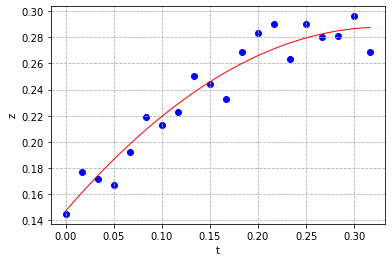

In [22]:
degree = 2
coefficients_array_Z_poly, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Equação: (" + str(coefficients_array_Z_poly[0]) + ") + (" + str(coefficients_array_Z_poly[1]) + ")*t + (" + str(coefficients_array_Z_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_poly, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_poly, "t", "z")

Nesse caso, **a equação de segundo grau** apresentou valor de MSE bem menor do que a equação linear. Por essa razão, escolhemos **a equação de segundo grau para predizer a trajetória na coordenada $z$**.

Portanto, para as dimensões $X$ e $Z$, equações lineares foram escolhidas e para predizer a dimensão $Y$, uma equação de segundo grau foi escolhida. Utilizaremos as três equações para predizer a trajetória tridimensional da bola desde $t = 0$ até o instante de tempo em que temos $y = 0$. Segue o *plot* da regressão.

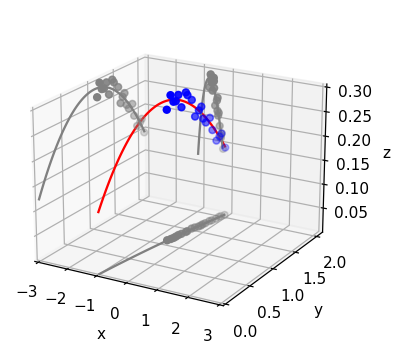

In [23]:
plot_3D_regression(output_values_X, output_values_Y, output_values_Z, coefficients_array_X_poly, coefficients_array_Y_linear, coefficients_array_Z_poly)

Sugundo a predição, o instante de tempo que ocorre $y = 0$ é:

In [24]:
t_max = max(np.roots(np.flip(coefficients_array_Y_linear)))
print("t_max: " + str(t_max))

t_max: 0.6853898101492805


Portanto, as coordenadas da bola nesse instante de tempo são:

In [25]:
print("x: " + str(get_hypothesis_value(coefficients_array_X_poly, t_max)))
print("y: " + str(get_hypothesis_value(coefficients_array_Y_linear, t_max)))
print("z: " + str(get_hypothesis_value(coefficients_array_Z_linear, t_max)))

x: -0.9790235016498928
y: 0.0
z: 0.4662697463328306


Seguindo as mesmas medidas apresentadas na Seção 2.1, temos que a largura entre as traves é de aproximadamente 3 metros e sabemos que o goleiro está no centro do gol. Assumimos que a altura da baliza é de 1 metro e que até o momento de chegada da bola em $y = 0$, o goleiro consegue se mover até 1.5 metros horizontalmente e até 0.5 metro de altura.

De acordo com a nossa predição da trajetória da bola, a bola irá em direção ao gol e goleiro alcançará a bola.

## 2.3 Taxa de aprendizado

Nesta Seção, discorreremos sobre o impacto da taxa de aprendizado na utilização do nosso algoritmo baseado no método do gradiente descendente. Para isso, consideraremos o caso em que desejamos predizer a dimensão Z do *dataset* kick2 com uma equação de segundo grau. Aqui, testamos três valores distintos da taxa de aprendizado $\alpha$: 0.5, 0.75 e 0.95. Começamos com $\alpha = 0.5$.

Número de iterações: 66651
Equação: (0.15103831930723977) + (0.7809505594236821)*t + (-1.0745226548652136)*t^2
Valor do MSE: 0.00015300254624238895


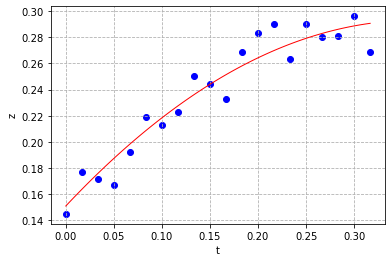

In [26]:
df = pd.read_table("kick2.dat", sep=' ', header=None).to_numpy()
time_stamps = np.linspace(0,(1/60)*19,20)
output_values_X = df[:,0]
output_values_Y = df[:,1]
output_values_Z = df[:,2]
degree = 2

learning_rate = 0.5

coefficients_array_Z_poly, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Número de iterações: " + str(n_iterations))
print("Equação: (" + str(coefficients_array_Z_poly[0]) + ") + (" + str(coefficients_array_Z_poly[1]) + ")*t + (" + str(coefficients_array_Z_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_poly, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_poly, "t", "z")

Em seguida, testamos $\alpha = 0.75$.

Número de iterações: 56745
Equação: (0.1484376229534134) + (0.8302085707825395)*t + (-1.2263356005194042)*t^2
Valor do MSE: 0.00014590123684383966


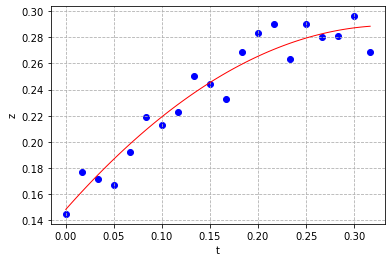

In [27]:
learning_rate = 0.75

coefficients_array_Z_poly, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Número de iterações: " + str(n_iterations))
print("Equação: (" + str(coefficients_array_Z_poly[0]) + ") + (" + str(coefficients_array_Z_poly[1]) + ")*t + (" + str(coefficients_array_Z_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_poly, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_poly, "t", "z")

Por fim, testamos $\alpha = 0.95$ (mesmo valor utilizado na Seção 2.3).

Número de iterações: 50465
Equação: (0.14734260721892) + (0.8509485150703235)*t + (-1.2902560055088366)*t^2
Valor do MSE: 0.0001438530522472066


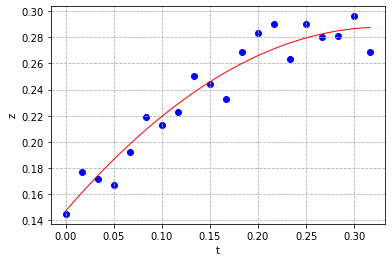

In [28]:
learning_rate = 0.95

coefficients_array_Z_poly, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Número de iterações: " + str(n_iterations))
print("Equação: (" + str(coefficients_array_Z_poly[0]) + ") + (" + str(coefficients_array_Z_poly[1]) + ")*t + (" + str(coefficients_array_Z_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_poly, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_poly, "t", "z")

Podemos observar que nos três casos, os coeficientes do polinômio são bastante semelhantes, assim como o *plot* das regressões. A principal diferença entre os testes está na quantidade de iterações que foram necessárias para levar o algoritmo à convergência de valores dos coeficientes. À medida que aumentamos o valor de $\alpha$, a quantidade de iterações utilizada pelo algoritmo diminuiu. Esse comportamente é esperado, tendo em vista que, como vimos em aula, o valor de $\alpha$ representa o tamamnho do "passo" que é dado no espaço de busca na direção de um mínimo local.Portanto, quanto menor o valor de $\alpha$, uma maior quantidade de passos é necessária e a convergência se dará de maneira mais lenta.

Observe ainda que é possível que algoritmo apresente um comportamento que leve a uma divergência, ao invés de convergir. Isso ocorre se tomarmos um valor de $\alpha$ suficientemente pequeno ou grande. Antes de conduzir os experimentos das Seções 2.1 e 2.2, fizemos testes preliminares em relação ao valor da taxa de aprendizado. Verificamos que, no caso geral, $\alpha = 0.95$ mostrou-se ser um valor que leva a uma rápida execução, sem sofrer com divergência. Por isso tal valor foi escolhido.

# 3 *Parte $II$ - Tarefa de Classificação*

# 4 *Considerações Finais*

Neste *notebook*, apresentamos as definições dos problemas explorados, os métodos utilizados para resolvê-los, assim como os resultados obtidos, de acordo com a especificação do projeto. Em particular, destacamos os seguintes pontos que foram exibidos no relatório.

A execução da Parte $I$ é relatada na Seção 2. Nessa Seção, descrevemos o problema de predição da trajetória da bola e apresentamos um algoritmo baseado no método de gradiente descendente para solucionar tal problema. Em particular, nas Seções 2.1, 2, fizemos o que segue.

* Definimos regressões para aprender os nossos modelos por meio do método do gradiente descendentes, implementado a partir "do zero";
* Treinamos regressões (linear e de polinômio de segundo grau) em cada *dataset* (Seções 2.1 e 2.2):
    * Derivamos uma equação linear e uma polinomial para explicar a trajetória da bola em cada dimensão em função do tempo;
    * Avaliamos e escolhemos as equações que melhor explicam os dados e combinamos as melhores equações para predizer a trajetória em três dimensões;
* Avaliamos o impacto da complexidade dos modelos (em relação ao grau do polinômio) por meio de métrica previamente estabelecida (MSE);
* Avaliamos o impacto da taxa de aprendizado (Seção 2.3);
* Utilizamos *plots* 2D e 3D para auxiliar na apresentação e discussão dos resultados.
    
Além disso, de modo geral, discutimos:

* Como/se normalização afetou os resultados (Parte $II$)
* A qualidade dos resultados em cada tarefa (Partes $I$ e $II$)
* As vantagens e desvantagens de cada método (Parte $II$)

Ambos discentes participaram ativamente durante todo o projeto. O aluno Felipe focou os seus esforços na Parte $I$ do projeto, enquanto a aluno Elisa esteve mais envolvida com a Parte $II$. Contudo, as pesquisas, revisões de código e tomadas de decisão foram sempre feitas em conjunto. 

# 5 Referências Bibliográficas

[1] ALPAYDIN, E. Introduction to Machine Learning. MIT Press, 3rd edition, 2014.

[2] BISHOP, C. M. Pattern Recognition and Machine Learning. Springer. Cambridge, 2007.

[3] MARSLAND, S. Machine Learning: an algorithm perspective. CRC Press, 2nd edition, 2015.